In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from PIL import Image, ImageOps
from plotnine import (ggplot, aes, geom_map, geom_text, geom_label, 
                      ggtitle, element_blank, element_rect, 
                      scale_fill_manual, theme_minimal, theme) 
from pulp import (LpProblem, LpMinimize, LpVariable, lpSum, 
                  PULP_CBC_CMD, GLPK_CMD, LpStatus, value) 

In [2]:
censusdf=pd.read_csv('IAcensus_withfips.csv')
censusdf.head()

,county_name,full_FIPS_Code,county_FIPS,population,total_units,occupied_units,vacant_units
0,Adair,19001,1,7496,3585,3217,368
1,Adams,19003,3,3704,1888,1614,274
2,Allamakee,19005,5,14061,7668,5797,1871
3,Appanoose,19007,7,12317,6306,5320,986
4,Audubon,19009,9,5674,2787,2498,289


In [3]:
shapefile_iowa = gpd.read_file('IA_counties/IA_counties.shp')  
# shapefile_iowa.head()

In [4]:
shapefile_iowa[['GEOID10','COUNTYFP10','NAME10','INTPTLAT10', 'INTPTLON10', 'geometry' ]].head()

,GEOID10,COUNTYFP10,NAME10,INTPTLAT10,INTPTLON10,geometry
0,19127,127,Marshall,+42.0416910,-092.9814523,"POLYGON ((-92.76679 42.12346, -92.76679 42.122..."
1,19011,011,Benton,+42.0925474,-092.0576300,"POLYGON ((-91.94773 41.86186, -91.95514 41.861..."
2,19041,041,Clay,+43.0798220,-095.1497261,"POLYGON ((-95.26926 43.25537, -95.26140 43.255..."
3,19165,165,Shelby,+41.6790143,-095.3089173,"POLYGON ((-95.20902 41.86371, -95.20890 41.863..."
4,19043,043,Clayton,+42.8409979,-091.3235108,"POLYGON ((-91.25080 42.64558, -91.25160 42.645..."


In [5]:
################## this is the stuff we were doing to make the merge work?

# df1 is a copy of censusdf to mess around with
# df1=censusdf.copy()

#dummy is a blank data frame we'll 
#       stack with shapefile_iowa columns to merge with df1
#       since we were having issues directly
# dummy=pd.DataFrame()
# dummy['county']=shapefile_iowa['NAME10']
# dummy['longitude']=shapefile_iowa['INTPTLON10']
# dummy['latitude']=shapefile_iowa['INTPTLAT10']

# dummy1=dummy.sort_values('county', ascending=True).copy()

# df1['latitude']=dummy1['latitude']
# df1['longitude']=dummy1['longitude']

# df1.head()

In [6]:
map_population_by_county_data = shapefile_iowa.merge(censusdf, left_on='GEOID10', right_on='full_FIPS_Code')
# map_population_by_county_data.head()




###########        can't remember the purpose of these?
# county_populations = np.array(censusdf['population'])
# state_population = sum(county_populations)
# censusdf.sort_values('population', ascending=False).head()

In [7]:
#need to cast lat/long as floats?

map_population_by_county_data = map_population_by_county_data.astype({"INTPTLON10":"float", "INTPTLAT10":"float"})
# map_population_by_county_data.info()

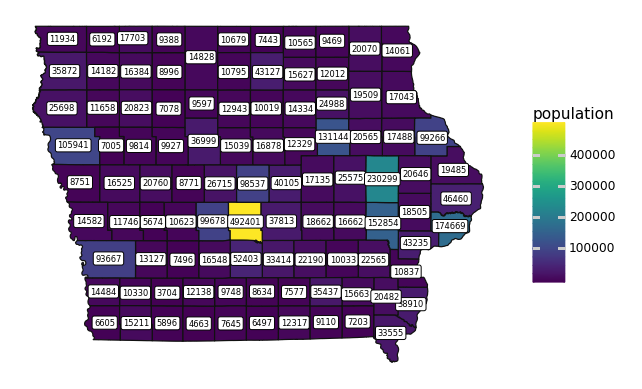

<ggplot: (8728196509209)>

In [8]:
map_population_by_county = (
    ggplot(map_population_by_county_data)
    + geom_map(aes(fill='population'))
    + geom_label(aes(x='INTPTLON10', y='INTPTLAT10', 
                     label='population',size=2), 
                 show_legend=False)
    + theme_minimal()
    + theme(axis_text_x=element_blank(),
            axis_text_y=element_blank(),
            axis_title_x=element_blank(),
            axis_title_y=element_blank(),
            axis_ticks=element_blank(),
            panel_grid_major=element_blank(),
            panel_grid_minor=element_blank()
           )
    )
map_population_by_county